In [ ]:
pip install pystan

In [13]:
pip install prophet

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [17]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import os

In [19]:
current_directory = os.getcwd()
file_path = os.path.join(os.path.dirname(current_directory), 'Dynamic data.xlsx')
df = pd.read_excel(file_path)


In [20]:
# Преобразовать данные в формат, который принимает Prophet
data = df.rename(columns={'YEARS': 'ds', 'WOPR:P1': 'y'})

In [25]:
# Определить размеры выборок
test_size = int(0.75 * len(data))
val_size = len(data) - test_size

In [26]:
# Разделить данные на тренировочную и валидационную выборки
train_data = data.iloc[:test_size]
val_data = data.iloc[test_size:]

In [37]:
train_data['ds']

0     0.000000
1     0.002738
2     0.007756
3     0.018002
4     0.035367
        ...   
62    4.665298
63    4.747433
64    4.832307
65    4.914442
66    4.999316
Name: ds, Length: 67, dtype: float64

<Axes: >

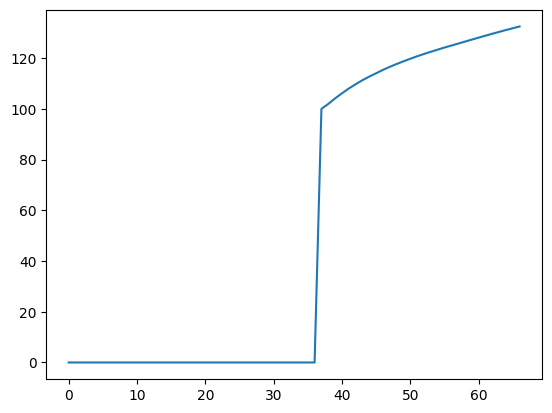

In [47]:
train_data['WWIR:I1'].plot()

In [27]:
# Создать и обучить модель Prophet
model = Prophet()
model.fit(train_data)

10:47:15 - cmdstanpy - INFO - Chain [1] start processing
10:47:15 - cmdstanpy - INFO - Chain [1] done processing


In [28]:
# Сделать прогнозы для валидационной выборки
future = model.make_future_dataframe(periods=val_size, freq='MS')
forecast = model.predict(future)

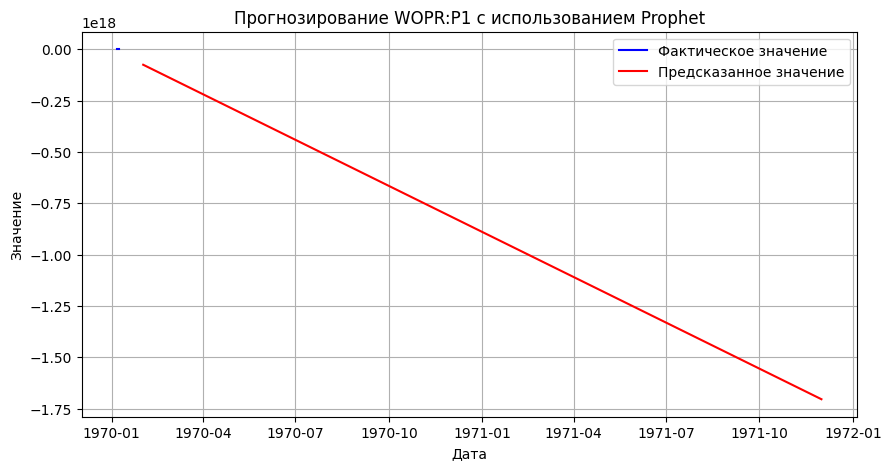

In [29]:
# Вывести графики фактических и предсказанных значений
plt.figure(figsize=(10, 5))
plt.plot(val_data['ds'], val_data['y'], label='Фактическое значение', color='blue')
plt.plot(forecast['ds'][-val_size:], forecast['yhat'][-val_size:], label='Предсказанное значение', color='red')
plt.title('Прогнозирование WOPR:P1 с использованием Prophet')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [49]:
# Получить значения времени (годы) и значения WOPR:P1
years = df['YEARS']
values = df['WOPR:P1']

In [50]:
# Создать интерполяционную функцию для полиномиальной интерполяции
interpolated_function = interp1d(years, values, kind='quadratic', fill_value='extrapolate')

In [51]:
# Создать будущие значения времени для экстраполяции
future_years = np.arange(max(years) + 1, max(years) + 37)  # Прогноз на следующие 36 месяцев (3 года)


In [52]:
# Получить прогнозируемые значения WOPR:P1
forecast_values = interpolated_function(future_years)



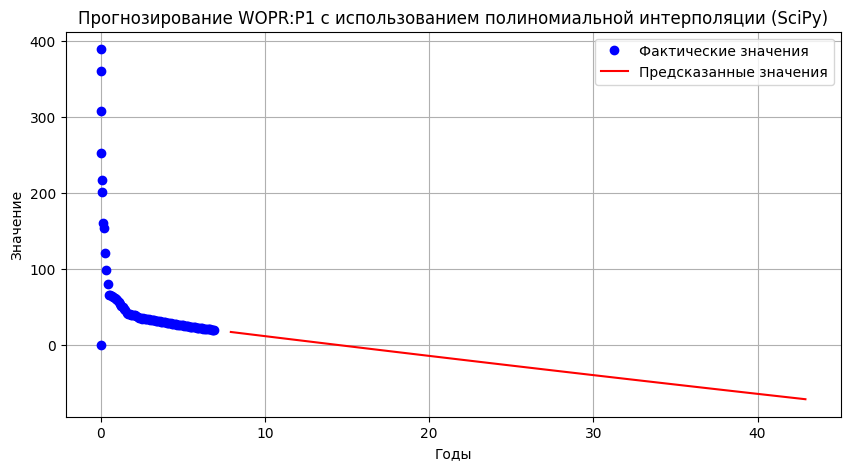

In [53]:
# Вывести график предсказанных значений
plt.figure(figsize=(10, 5))
plt.plot(years, values, 'bo', label='Фактические значения')
plt.plot(future_years, forecast_values, 'r-', label='Предсказанные значения')
plt.title('Прогнозирование WOPR:P1 с использованием полиномиальной интерполяции (SciPy)')
plt.xlabel('Годы')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()